In [1]:
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
# Paths
input_folder = "images_with_hair"
output_folder = "images_with_out_hair"

In [3]:

kernel = cv2.getStructuringElement(1,(17,17)) # Kernel for the morphological filtering


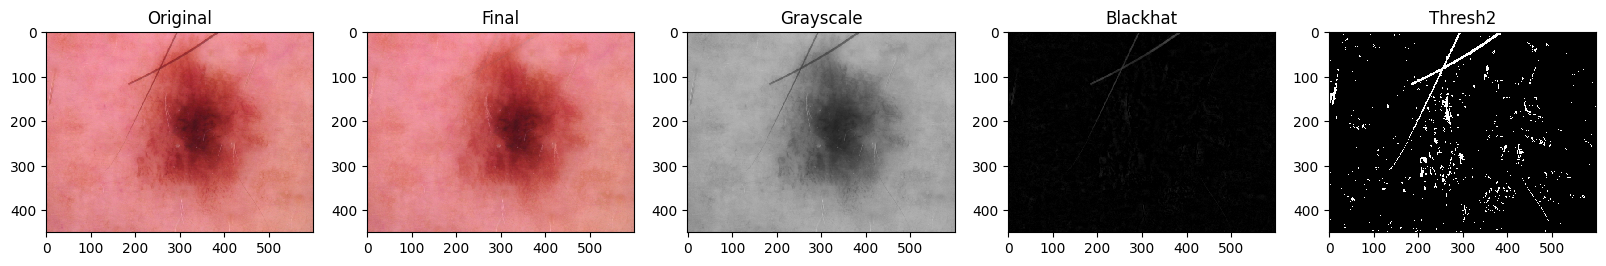

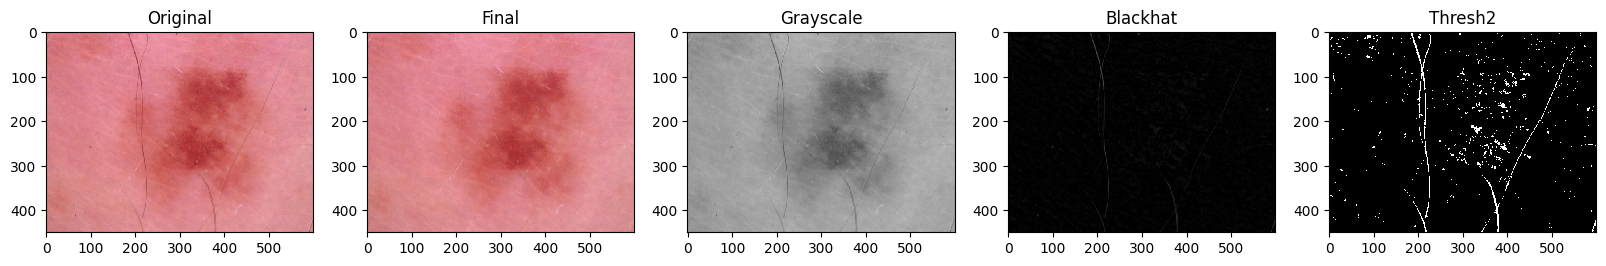

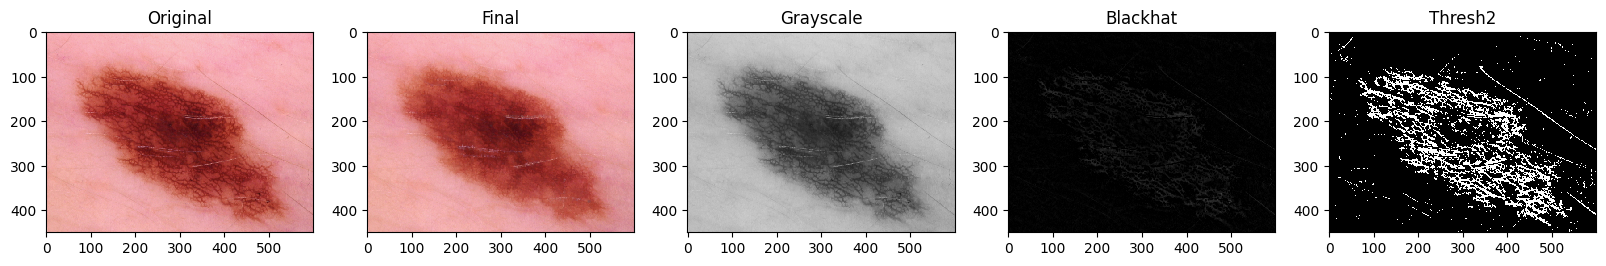

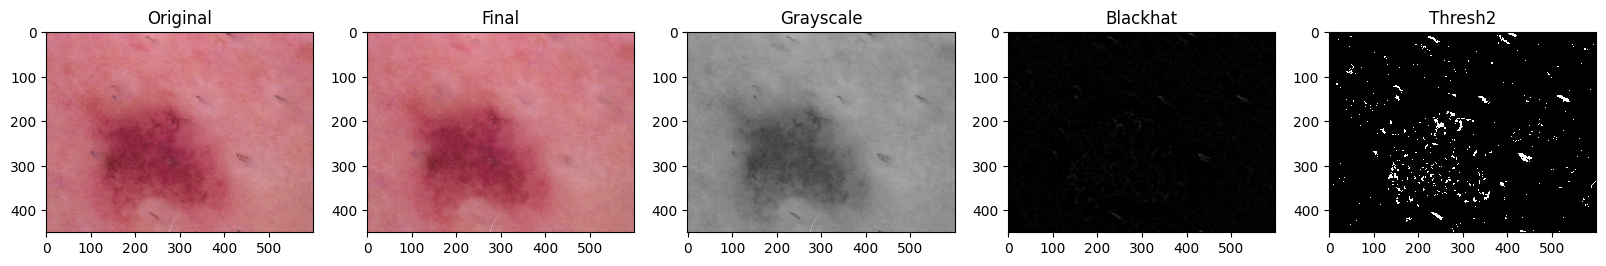

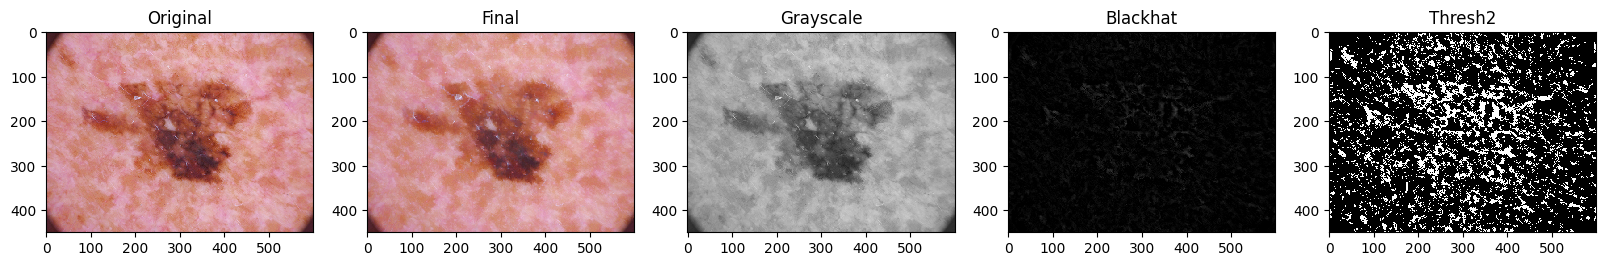

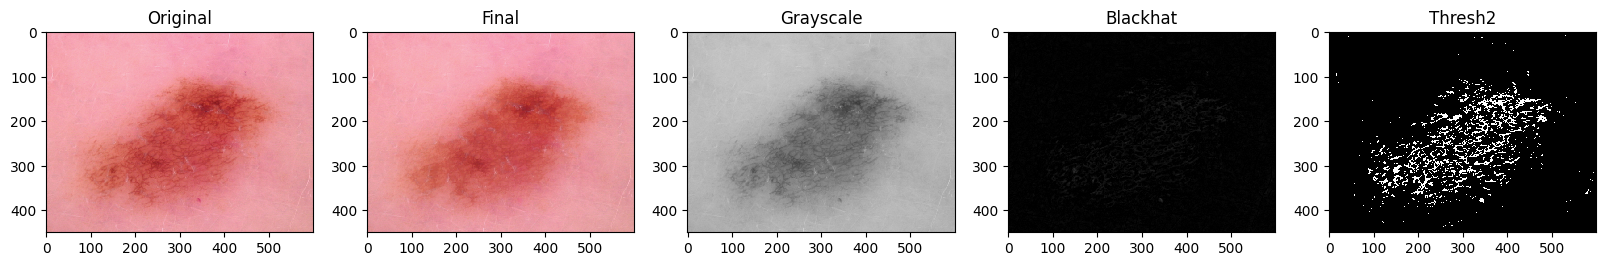

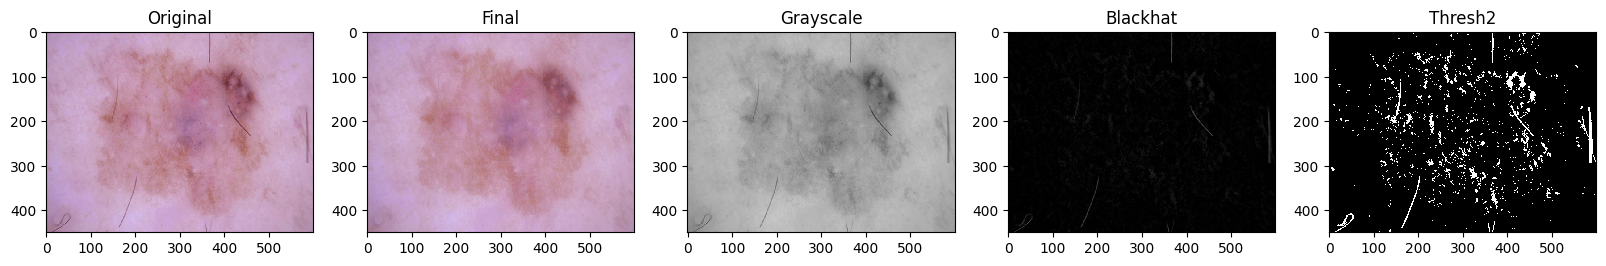

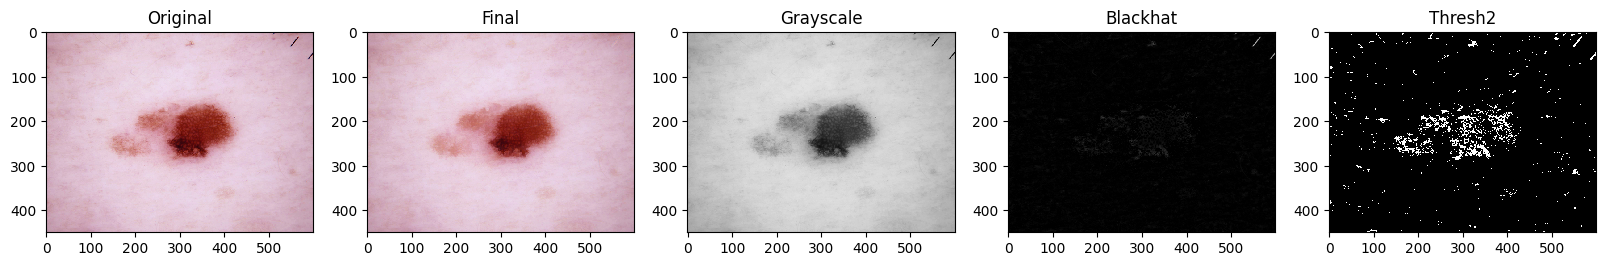

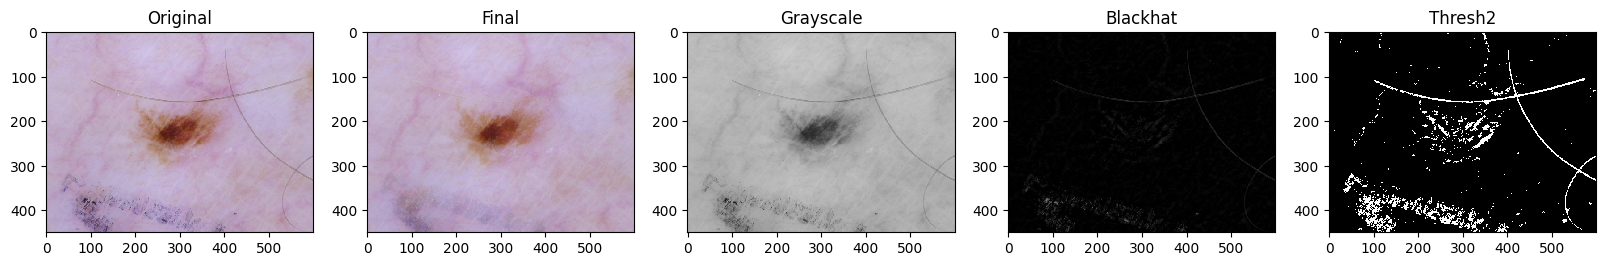

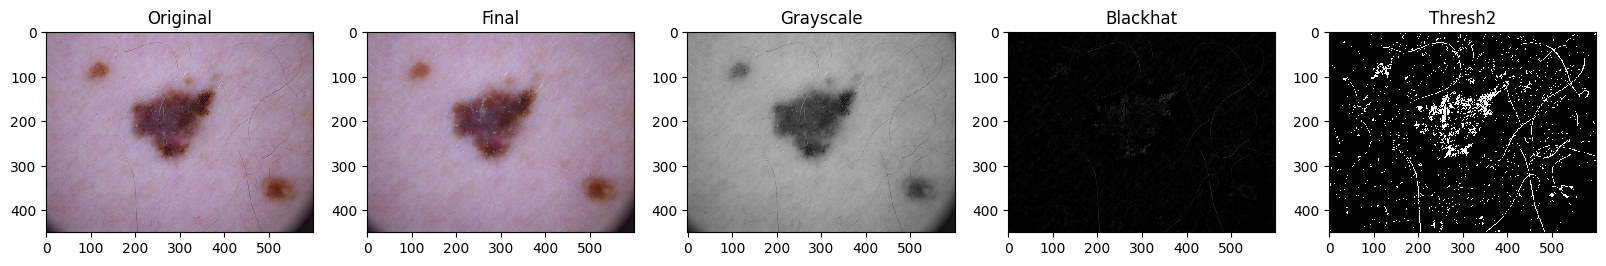

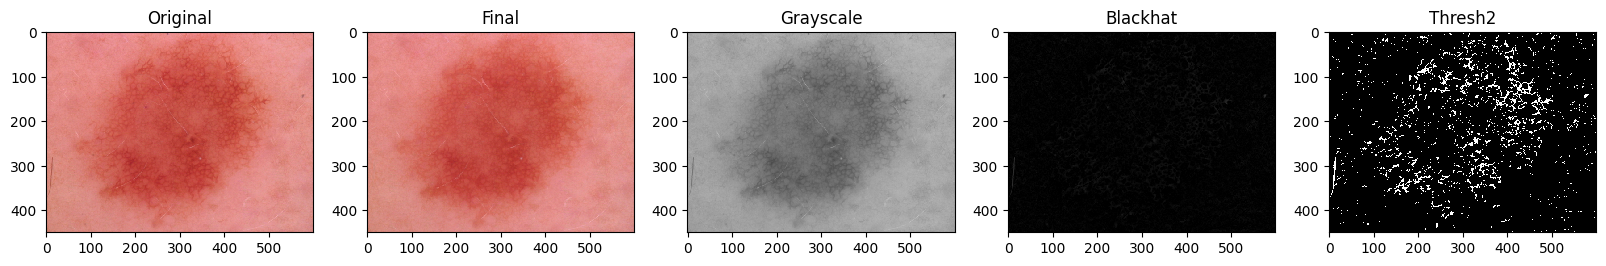

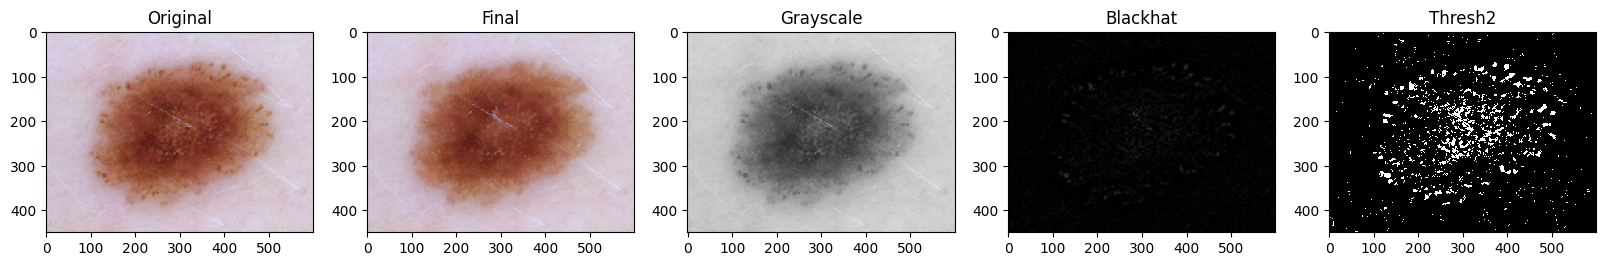

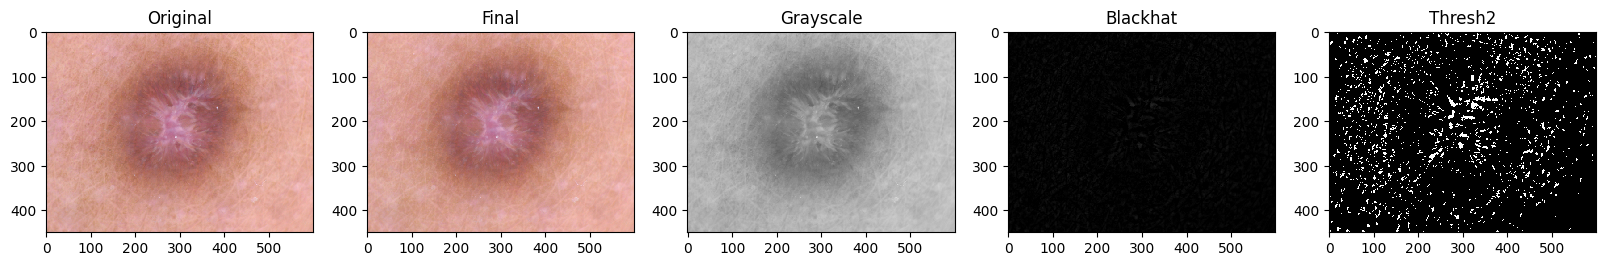

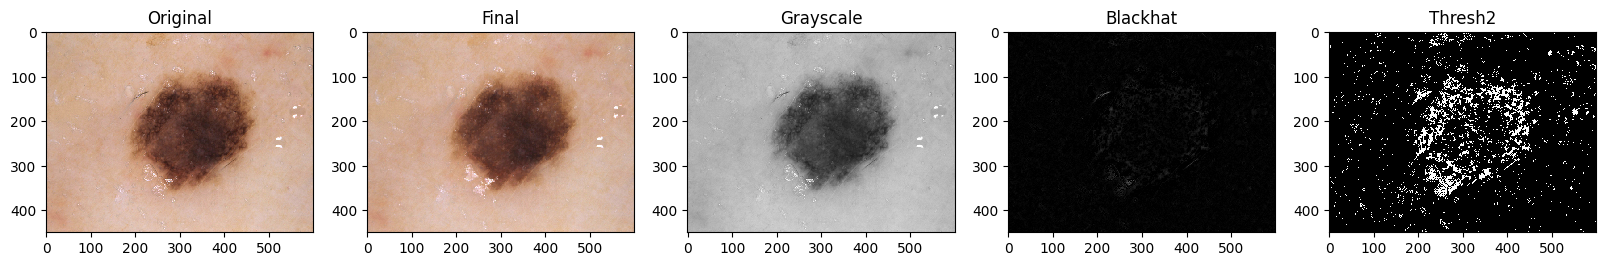

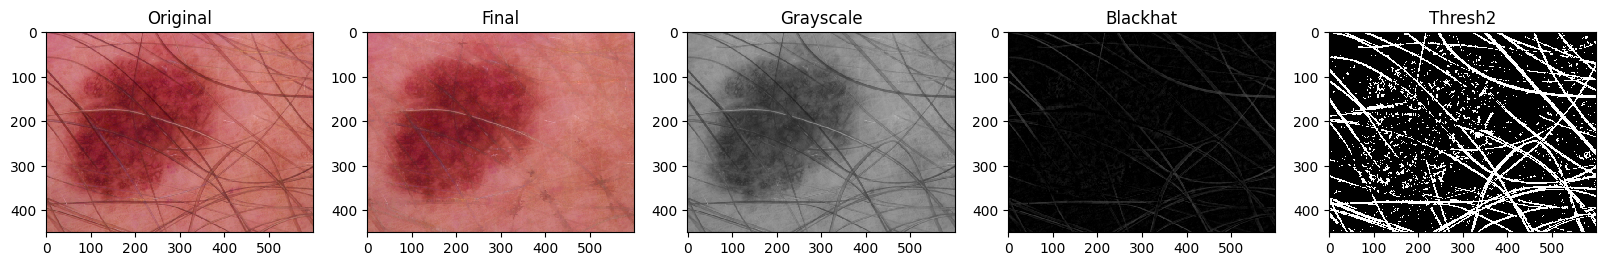

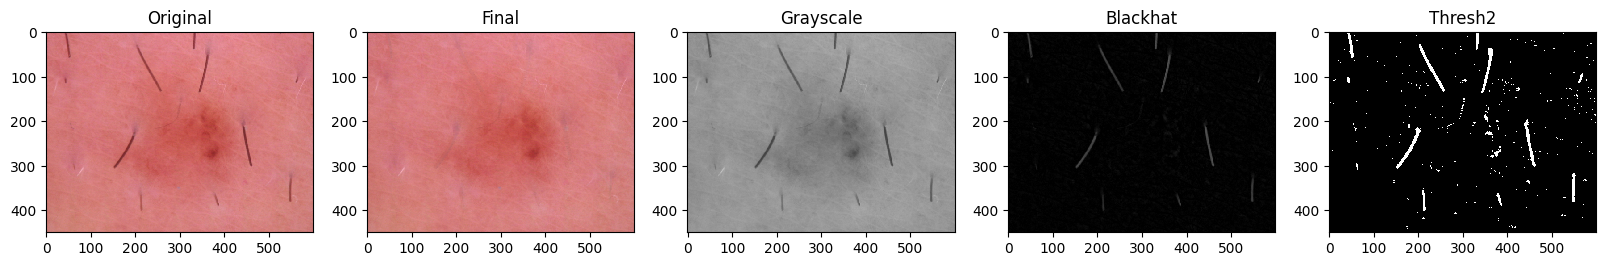

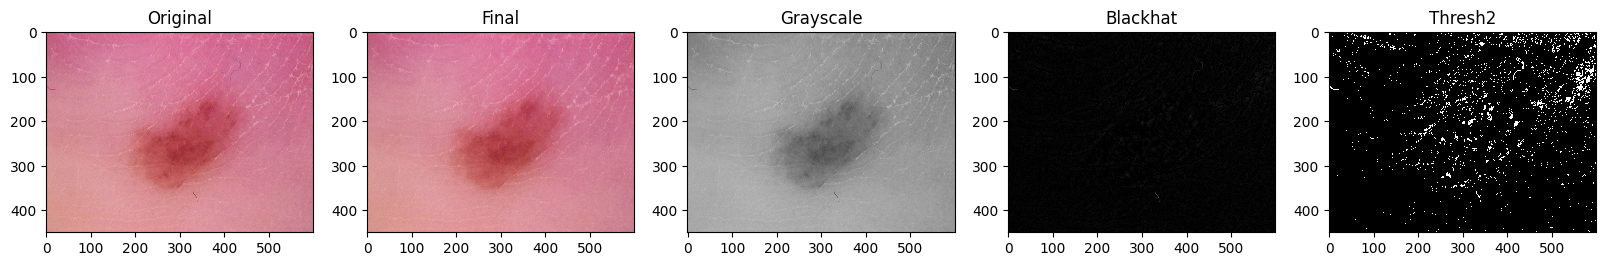

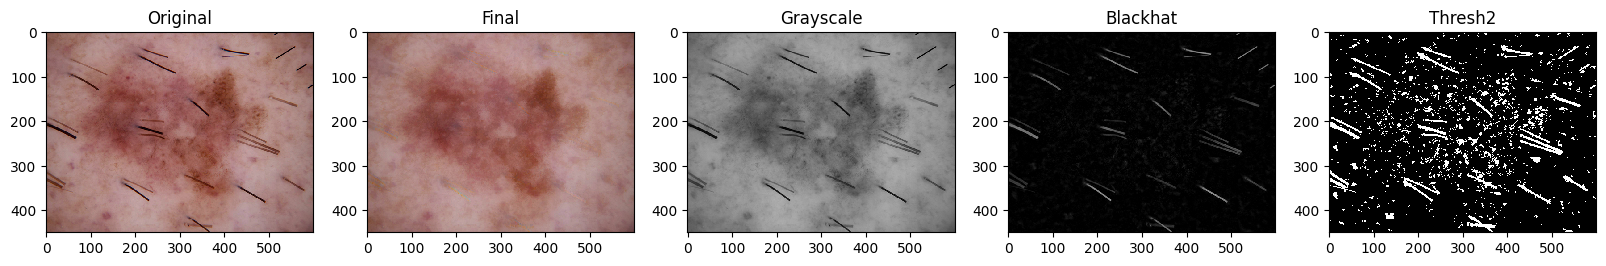

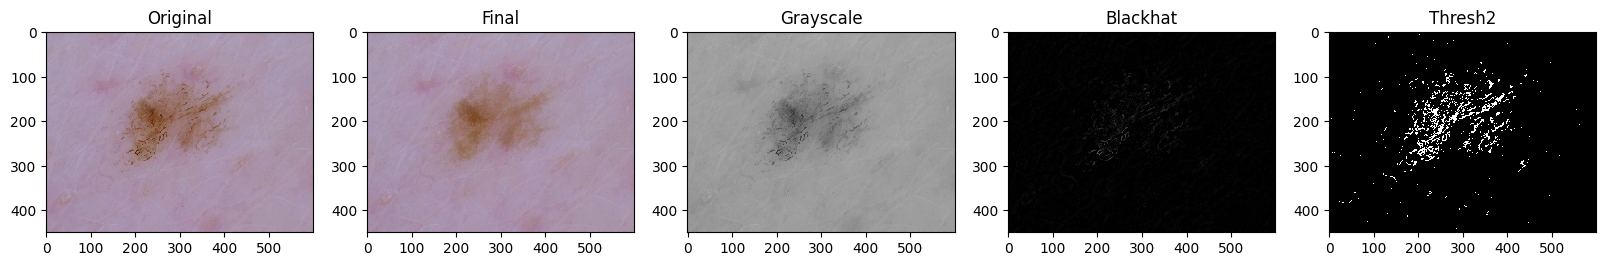

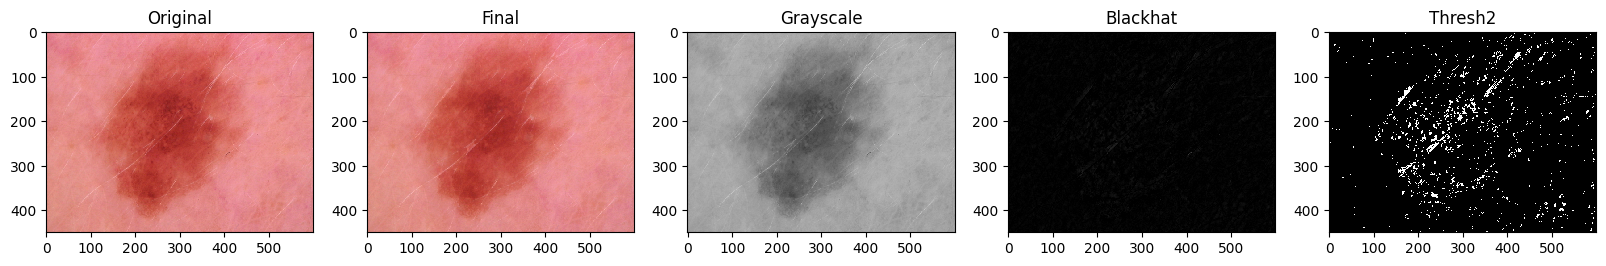

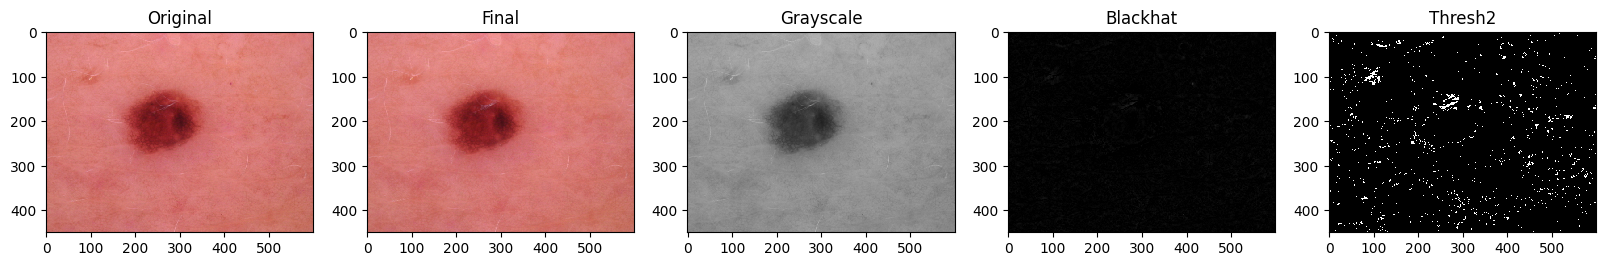

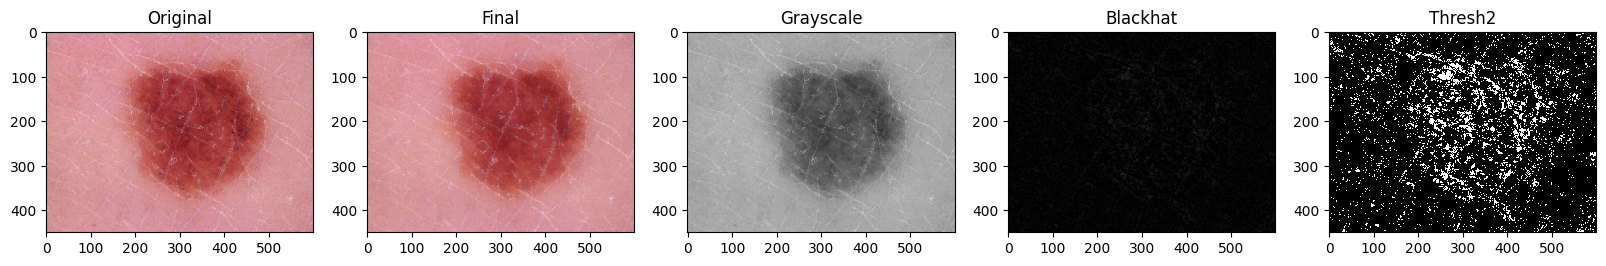

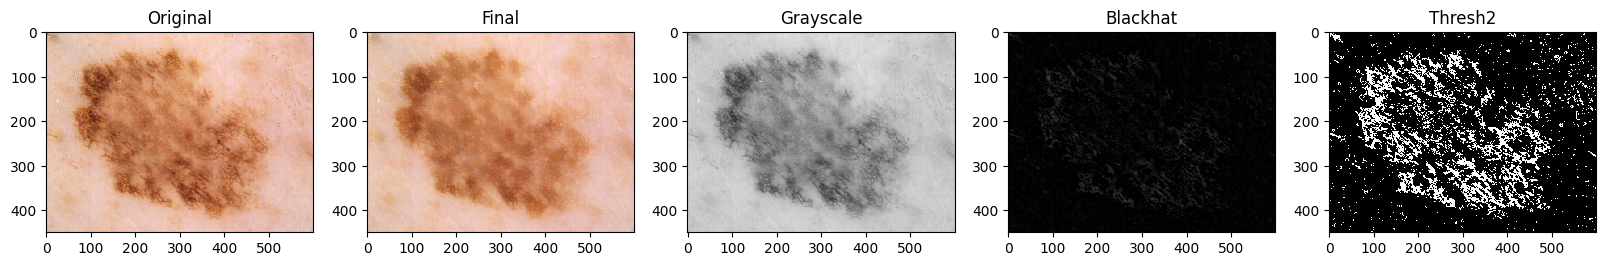

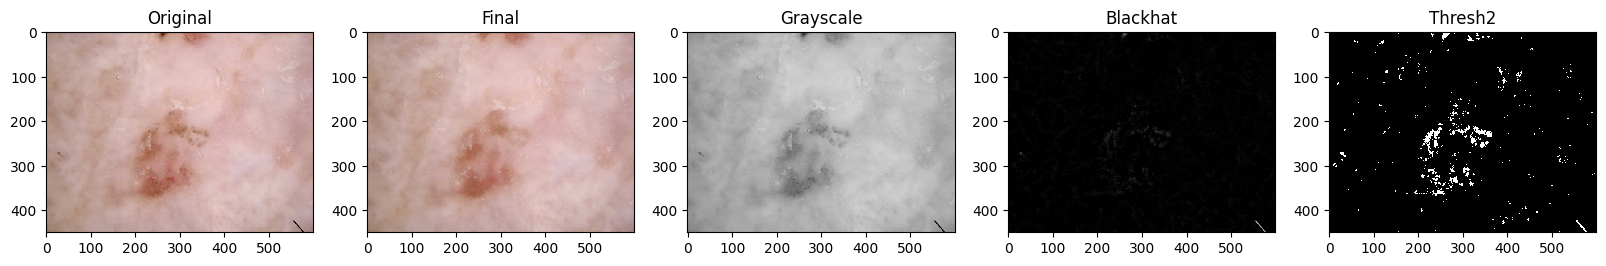

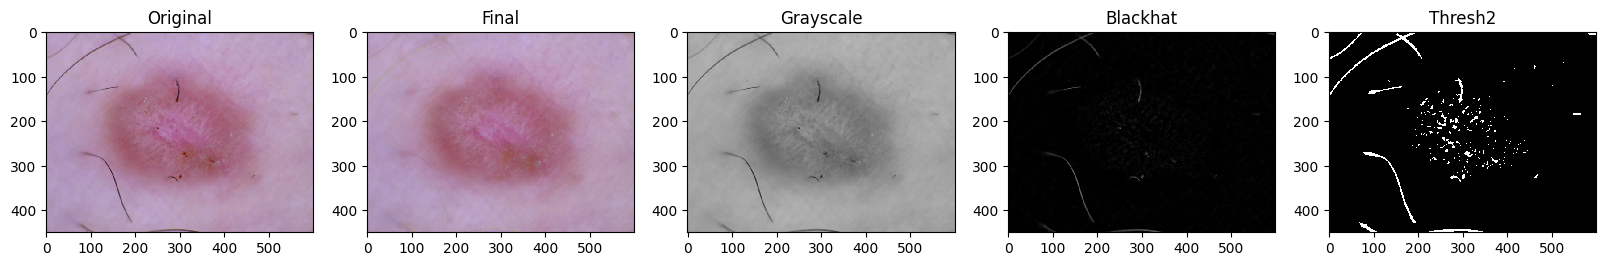

In [4]:
# Function to process images in a folder
def process_images_in_folder(input_folder):
    # Initialize counter
    count = 0
    
    # Loop through each file in the folder
    for filename in os.listdir(input_folder):
        
        if count >= 25:
            break  # Break the loop if 5 images have been processed
            
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        grayScale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert the original image to grayscale
        blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)  # Perform blackHat filtering
        ret, thresh2 = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)  # Intensify hair contours
        dst = cv2.inpaint(image, thresh2, 1, cv2.INPAINT_TELEA)  # Inpaint the original image
        
        # Plot images
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 5, 1).set_title('Original')
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), interpolation='nearest')
        plt.subplot(1, 5, 3).set_title('Grayscale')
        plt.imshow(cv2.cvtColor(grayScale, cv2.COLOR_BGR2RGB), interpolation='nearest')
        plt.subplot(1, 5, 4).set_title('Blackhat')
        plt.imshow(cv2.cvtColor(blackhat, cv2.COLOR_BGR2RGB), interpolation='nearest')
        plt.subplot(1, 5, 5).set_title('Thresh2')
        plt.imshow(cv2.cvtColor(thresh2, cv2.COLOR_BGR2RGB), interpolation='nearest')
        plt.subplot(1, 5, 2).set_title('Final')
        plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB), interpolation='nearest')
        plt.show()
        
        count += 1  # Increment counter

# Call the function to process images in the folder
process_images_in_folder(input_folder)

In [8]:
# Function to remove hair from an image
def remove_hair(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Apply morphological blackhat operation
    blackhat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, kernel)
    
    # Threshold to create mask
    _, mask = cv2.threshold(blackhat, 10, 255, cv2.THRESH_BINARY)
    
    # Inpainting to remove hair
    dst = cv2.inpaint(image, mask, 1, cv2.INPAINT_TELEA)
    
    return dst

# Create output folder if it doesn't exist
#os.makedirs(output_folder, exist_ok=True)

# Process each image in the input folder
for filename in os.listdir(input_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):
        # Read image
        image_path = os.path.join(input_folder, filename)
        image = cv2.imread(image_path)
        
        # Remove hair
        processed_image = remove_hair(image)
        
        # Save processed image to output folder
        output_path = os.path.join(output_folder, filename)
        cv2.imwrite(output_path, processed_image)